In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- So, there are no null values

### Data Analysis and Visualization

In [8]:
#Statistical measures of the dataset:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


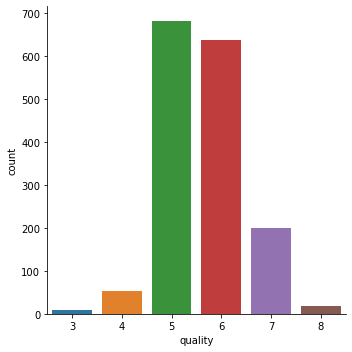

In [9]:
# number of values for each quality:
sns.catplot(x='quality', data = wine_data, kind = 'count')

- OR

In [10]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

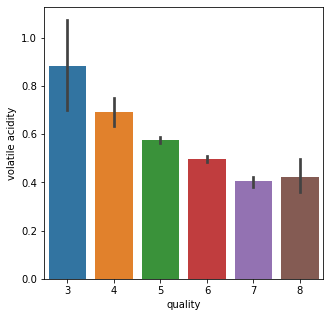

In [12]:
# graph between volatile acidity vs Quality:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

- So, here we see that if volatile acidity is high quality is bad. Inverse proportionality.  

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

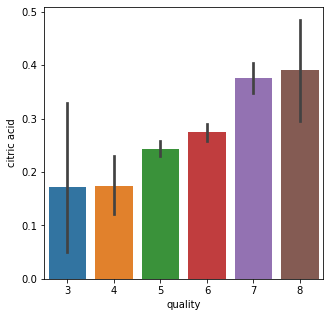

In [14]:
# graph between citric acid vs Quality:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

- here we see as citric acid content is more quality is more. In similar way we can check other columns

- This is the advantage of data analysis part. It helps us to understand which data are more related to label.

### Feature Selection

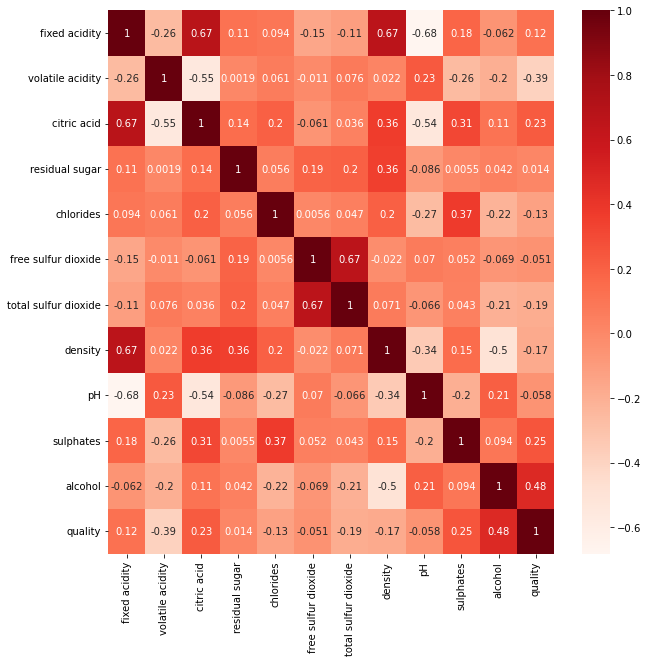

In [28]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (10,10))
sns.heatmap(wine_data.corr(), annot = True, cmap = "Reds")
plt.show()

### Data Preprocessing

In [29]:
X = wine_data.drop('quality', axis =1)
y = wine_data['quality'] 

In [30]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [31]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### Label Binarization 

Label binarization is a technique in machine learning and data preprocessing where a categorical variable or label is transformed into a binary representation. This technique is often used when training classification models, where the target variable needs to be in a numeric form that can be used in mathematical calculations.

- It means to label the quality or dependent variable.
- Like labelling good or bad based on some value

#### Here, let quality >=7 be good and <7 be bad
Good = 1; Bad = 0

In [36]:
Y = y.apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Train_test_split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [40]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


### Fitting model using Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [46]:
reg_rf.score(X_train, Y_train)

1.0

### Model Evaluation

In [45]:
reg_rf.score(X_test, Y_test)

0.925

In [53]:
from sklearn.metrics import accuracy_score

In [55]:
Y_pred = reg_rf.predict(X_test)
test_data_accuracy = accuracy_score(Y_pred, Y_test)
print(test_data_accuracy)

0.925


### Building a predictive system

In [64]:
input_data = (6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#re-shape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg_rf.predict(input_data_reshaped)

if (prediction == 1):
    print('Good quality wine')
else:
    print('Bad quality wine')

Bad quality wine


C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


----------

## Trying All Other Types of Classification models:

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,\
                            precision_score, recall_score, f1_score,roc_auc_score,roc_curve 

In [73]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train) #train model
    
    #Make predictions:
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    #Training set performance:
    model_train_accuracy= accuracy_score(Y_train,Y_train_pred)
    model_train_f1 = f1_score(Y_train,Y_train_pred, average = 'weighted')
    model_train_precision = precision_score(Y_train,Y_train_pred)
    model_train_recall = recall_score(Y_train, Y_train_pred)
    model_train_rocauc_score = roc_auc_score(Y_train,Y_train_pred)
       
    #Test set performance:
    model_test_accuracy= accuracy_score(Y_test,Y_test_pred)
    model_test_f1 = f1_score(Y_test,Y_test_pred, average = 'weighted')
    model_test_precision = precision_score(Y_test,Y_test_pred)
    model_test_recall = recall_score(Y_test,Y_test_pred)
    model_test_rocauc_score = roc_auc_score(Y_test,Y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training Set')
    print(" - Accuracy: {:.4f}".format(model_train_accuracy))
    print(" - F1 score: {:.4f}".format(model_train_f1))
    print(" - Precision: {:.4f}".format(model_train_precision))
    print(" - Recall: {:.4f}".format(model_train_recall))
    print(" - Roc Auc Score: {:.4f}".format(model_train_rocauc_score))
    
    print('------------------------------------------------------------------------')
    
    print('Model performance for Training Set')
    print(" - Accuracy: {:.4f}".format(model_test_accuracy))
    print(" - F1 score: {:.4f}".format(model_test_f1))
    print(" - Precision: {:.4f}".format(model_test_precision))
    print(" - Recall: {:.4f}".format(model_test_recall))
    print(" - Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
    
    
    print('*'*50)
    print('\n')

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training Set
 - Accuracy: 0.8765
 - F1 score: 0.8553
 - Precision: 0.6154
 - Recall: 0.2727
 - Roc Auc Score: 0.6228
------------------------------------------------------------------------
Model performance for Training Set
 - Accuracy: 0.8875
 - F1 score: 0.8754
 - Precision: 0.6000
 - Recall: 0.3659
 - Roc Auc Score: 0.6650
**************************************************


Decision Tree
Model performance for Training Set
 - Accuracy: 1.0000
 - F1 score: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - Roc Auc Score: 1.0000
------------------------------------------------------------------------
Model performance for Training Set
 - Accuracy: 0.8938
 - F1 score: 0.8948
 - Precision: 0.5814
 - Recall: 0.6098
 - Roc Auc Score: 0.7726
**************************************************


Random Forest Classifier
Model performance for Training Set
 - Accuracy: 1.0000
 - F1 score: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - Roc Auc Score: 1

- Logistic Regression : low accuracy
- Decision Tree: Overfitting issue

- So, we can go with Random Forest and go for Hyper Parameter tuning

### Hyper Parameter tuning

- using **RandomizedSearchCV**

In [74]:
rf_params = {"max_depth": [5,8,15,None,10],
            "max_features": [5,7,'auto',8],
            "min_samples_split": [2,8,15,20],
            "n_estimators": [100,200,500,1000]}

In [75]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [77]:
# Models List for Hyperparameter tuning
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]

In [78]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [87]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                               param_distributions=params,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train, Y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f'Best Params for {model_name}')
    print(model_param[model_name])
    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params for RF
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000,max_features=5)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.91875